# 0 Testing environment for Python
This is a testing environment, to elaborate methods and functions for the rersearch paper containing CCT computing resp. simulation.

## .1 Trying to reproduce a SMIB model
Testing / reproducing of a SMIB model after [Georg Kordowich](https://medium.com/@georg.kordowich/watts-up-with-dynamic-power-system-simulations-c0f16fc99769), helping files and documentation can be found on [GitHub](https://github.com/georgkordowich/smib-simulation):

In [42]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import odeint

import simulation as s

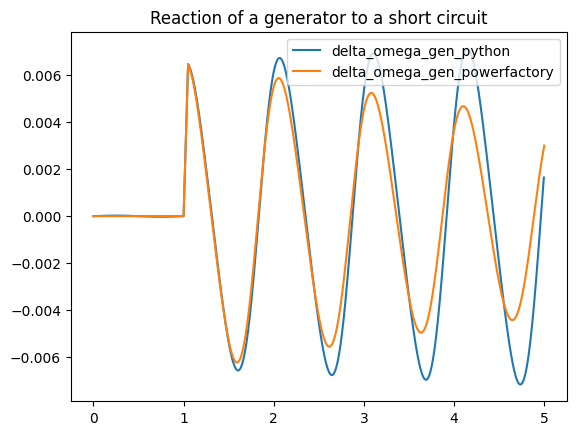

In [43]:
# Here the simulation is executed and the timesteps and corresponding results are returned.
# In this example, the results are omega, delta, e_q_t, e_d_t, e_q_st, e_d_st of the generator and the IBB
t_sim, res = s.do_sim()

# calculate the solution with python internal solving methods (e.g. odeint)


# load the results from powerfactory for comparison
delta_omega_pf = np.loadtxt('pictures/powerfactory_data.csv', skiprows=1, delimiter=',')

# Plot the results
plt.plot(t_sim, res[:, 0].real, label='delta_omega_gen_python')
plt.plot(delta_omega_pf[:, 0], delta_omega_pf[:, 1] - 1, label='delta_omega_gen_powerfactory')
plt.legend()

plt.title('Reaction of a generator to a short circuit')

plt.show()

In [44]:
# calculating the average mean error (absolute and relative) vs. powerfactory

def error_abs(array1, array2):
    # returning the cumulated, over a time period normalized, mean absolute error in rad
    n_timesteps = np.size(array1)
    error_cum = 0

    for i in range(n_timesteps-1):
        error_cum = error_cum + np.abs((array1[i] - 1) - array2[i])

    error_abs = error_cum/n_timesteps
    return error_abs

def error_rel(array1, array2):
    # returning the cumulated, over a time period normalized, mean relative error
    n_timesteps = np.size(array1) # how many single errors; altought not working when size(array1) != size(array2)
    error_cum = 0

    # adding the singel errors up
    for i in range(n_timesteps-1):
        error_cum = error_cum + np.abs(1 - (array1[i] - 1)/array2[i])

    error_rel = error_cum/n_timesteps
    return error_rel

print('abs error: ' + str(round(np.rad2deg(error_abs(delta_omega_pf[:, 1], res[:, 0].real)), 6)) + ' grad')
print('rel error: ' + str(round(error_rel(delta_omega_pf[:, 1], res[:, 0].real)*100, 2)) + ' %')

abs error: 0.055202 grad
rel error: 70.44 %


## .2 Comparison to pythons solution
Solving the differential equation with Python build-in *odeint()* solvers. Comparing it to the others.

-> Possible? Or self implementing of Runge-Kutta, Predictor-Corrector, ...

In [2]:
# pre-definitions
t = np.arange(0, 5, 0.005)

# Define the parameters of the system
fn = 60
H_gen = 3.5
X_gen = 0.2
X_ibb = 0.1
X_line = 0.65

# Values are initialized from loadflow
E_fd_gen = 1.075
E_fd_ibb = 1.033
P_m_gen = 1998/2200

omega_gen_init = 0
delta_gen_init = np.deg2rad(45.9)
delta_ibb_init = np.deg2rad(-5.0)

v_bb_gen_init = s.mag_and_angle_to_cmplx(1.0, np.deg2rad(36.172))

# function representing the ode
def tsa(result_odeint, t):
    return [result_odeint[0], 1/(2*H_gen)*(T_m_gen - P_e_gen)]

# solving with initial conditions. machine parameters and time frame from above
omega_odeint, delta_odeint = odeint(tsa, [0, np.deg2rad(45.9)], t).T

NameError: name 'np' is not defined